# K-means
K-means clustering is an unsupervised learning algorithm
The K-means clustering algorithm is used to find groups which have not been explicitly labeled in the data and to find patterns and make better decisions.. Once the algorithm has been run and the groups are defined, any new data can be easily assigned to the most relevant group.

# K-means applied in:

*Customer Profiling,

*market segmentation,

*computer vision

*Geo-statistics

*Astronomy

*recommendation

*Document Clustering

*Image Segmentation

In [1]:
#The main objective of the K-Means algorithm is to minimize the sum of distances between the points and their respective 
#cluster centroid

In [2]:
#import necessary libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

In [3]:
data= pd.read_csv('C:/Users/jagadeesh baman/Documents/alldata/mall.csv')
data.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
#now we need to select the value of K randomly

In [5]:
#for simplicity take any two values, you can take whole data too
df=data[['Annual Income (k$)','Spending Score (1-100)']]

In [6]:
df.head()

,Annual Income (k$),Spending Score (1-100)
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40


In [7]:
#doing normalization
from sklearn.preprocessing import MinMaxScaler
sclaed=MinMaxScaler()
X_scaled=sclaed.fit(df)
X_scaled=sclaed.transform(df)

In [8]:
X_scaled[0:5]

array([[0.        , 0.3877551 ],
       [0.        , 0.81632653],
       [0.00819672, 0.05102041],
       [0.00819672, 0.7755102 ],
       [0.01639344, 0.39795918]])

In [9]:
from sklearn.metrics import silhouette_score, davies_bouldin_score,v_measure_score

In [10]:
#now going to create diffirent list for diffirent purpose

In [11]:
km_scores= []
km_silhouette = []
db_score = []
for i in range(2,12):
    km = KMeans(n_clusters=i, random_state=0).fit(X_scaled)
    preds = km.predict(X_scaled)
    
    print("Score for number of cluster(s) {}: {}".format(i,km.score(X_scaled)))
    km_scores.append(-km.score(X_scaled))
    
    silhouette = silhouette_score(X_scaled,preds)
    km_silhouette.append(silhouette)
    print("Silhouette score for number of cluster(s) {}: {}".format(i,silhouette))
    
    db = davies_bouldin_score(X_scaled,preds)
    db_score.append(db)
    print("Davies Bouldin score for number of cluster(s) {}: {}".format(i,db))
    
    

Score for number of cluster(s) 2: -13.993505283127977
Silhouette score for number of cluster(s) 2: 0.3334020547986479
Davies Bouldin score for number of cluster(s) 2: 1.1371498756416885
Score for number of cluster(s) 3: -9.058985215159455
Silhouette score for number of cluster(s) 3: 0.451490930953965
Davies Bouldin score for number of cluster(s) 3: 0.8463302919900029
Score for number of cluster(s) 4: -6.110312266413654
Silhouette score for number of cluster(s) 4: 0.49620078746385005
Davies Bouldin score for number of cluster(s) 4: 0.7033318894472995
Score for number of cluster(s) 5: -3.5831179059525584
Silhouette score for number of cluster(s) 5: 0.5594854531357838
Davies Bouldin score for number of cluster(s) 5: 0.5678112087671997
Score for number of cluster(s) 6: -3.1006663776847865
Silhouette score for number of cluster(s) 6: 0.5361045104938877
Davies Bouldin score for number of cluster(s) 6: 0.6898891791016174
Score for number of cluster(s) 7: -2.6412299395240915
Silhouette score f

# elbow method

The elbow method is used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

The same method can be used to choose the number of parameters in other data-driven models, such as the number of principal components to describe a data set.

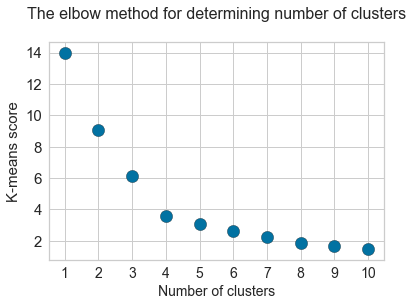

In [12]:
plt.title("The elbow method for determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(1,11)],y=km_scores,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("K-means score",fontsize=15)
plt.xticks([i for i in range(1,11)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [13]:
#here we clearly say elbow is at 5, so we take k = 5

#Unfortunately, we do not always have such clearly clustered data. This means that the elbow may not be clear and sharp.

#for that time we go with another method called "Silhouette Method", we will explain clearly this below

In [14]:
#going with 5 clusters

kmeans = KMeans(n_clusters =5 , init="k-means++", max_iter=300, n_init=10, random_state=0)
y_means = kmeans.fit_predict(X_scaled)


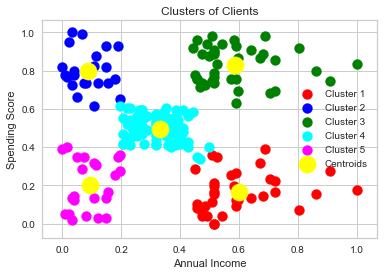

In [15]:
plt.scatter(X_scaled[y_means == 0 ,0], X_scaled[y_means == 0,1] , s=100 , c='red' , label='Cluster 1')
plt.scatter(X_scaled[y_means == 1 ,0], X_scaled[y_means == 1,1] , s=100 , c='blue' , label='Cluster 2')
plt.scatter(X_scaled[y_means == 2 ,0], X_scaled[y_means == 2,1] , s=100 , c='green' , label='Cluster 3')
plt.scatter(X_scaled[y_means == 3 ,0], X_scaled[y_means == 3,1] , s=100 , c='cyan' , label='Cluster 4')
plt.scatter(X_scaled[y_means == 4 ,0], X_scaled[y_means == 4,1] , s=100 , c='magenta' , label='Cluster 5')
plt.scatter(kmeans.cluster_centers_[: , 0], kmeans.cluster_centers_[:,1] , s =300 , c='yellow' , label = 'Centroids')
plt.title("Clusters of Clients")
plt.xlabel('Annual Income')
plt.ylabel('Spending Score')
plt.legend()
plt.show()

In [16]:
#like this we will get our cluesters

# Silhouette Method

The silhouette value measures how similar a point is to its own cluster (cohesion) compared to other clusters (separation).

The range of the Silhouette value is between +1 and -1. A high value is desirable and indicates that the point is placed in the correct cluster. If many points have a negative Silhouette value, it may indicate that we have created too many or too few clusters.
The Silhouette Value s(i) for each data point i is defined as follows:

 
       s(i)=b(i)-a(i)/max{a(i),b(i)},if modulus ci>1
        
        and
        
        
        s(i)=0 if modulus of c(i) = 1


In [17]:
#simply a(i) is intra-cluster distance and b(i) is mean nearest-cluester distance


#and if s(i) value is more then cluesters are good, and if it is low then we neeed to change the number of cluersters


#and a(i) >> b(i) not good, a(i) << b(i) is good

Note: s(i) is defined to be equal to zero if i is the only point in the cluster. This is to prevent the number of clusters from increasing significantly with many single-point clusters.
Here, a(i) is the measure of similarity of the point i to its own cluster. It is measured as the average distance of i from other points in the cluster.

 


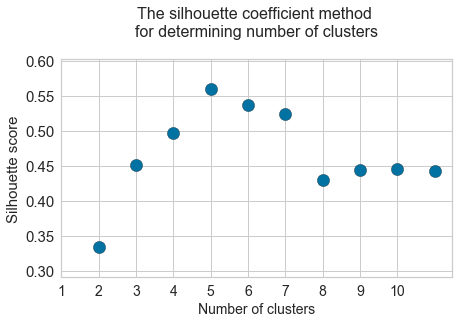

In [18]:
plt.figure(figsize=(7,4))
plt.title("The silhouette coefficient method \nfor determining number of clusters\n",fontsize=16)
plt.scatter(x=[i for i in range(2,12)],y=km_silhouette,s=150,edgecolor='k')
plt.grid(True)
plt.xlabel("Number of clusters",fontsize=14)
plt.ylabel("Silhouette score",fontsize=15)
plt.xticks([i for i in range(1,11)],fontsize=14)
plt.yticks(fontsize=15)
plt.show()

In [19]:
#see for value 5, the more sihouette score so select k as 5

this is alll about K-means

next comingup with different cluesteribg algorithams like 'HC', stay tuned